In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# グラフ描画に用いる関数

In [2]:
def draw_four_hist_graphs(v):
    
    fig = plt.figure(figsize=(12,7))
    
    ax1 = fig.add_subplot(2,2,1)
    ax1_hist, ax1_vins, _ = ax1.hist(v[0])
    ax1.set_title('region 1, 2' + '   n = ' + str(len(v[0])) )

    ax2 = fig.add_subplot(2,2,2)
    ax2_hist, ax2_vins, _ = ax2.hist(v[1])
    ax2.set_title('region 3, 4' + '   n = ' + str(len(v[1])) )

    ax3 = fig.add_subplot(2,2,3)
    ax3_hist, ax3_vins, _ = ax3.hist(v[2])
    ax3.set_title('region 5, 6, 7' + '   n = ' + str(len(v[2])) )
    
    ax4 = fig.add_subplot(2,2,4)
    ax4_hist, ax4_vins, _ = ax4.hist(v[3])
    ax4.set_title('region 8' + '   n = ' + str(len(v[3])) )
    
    plt.show()

In [3]:
def draw_four_bar_graphs(v, label):
    
    fig = plt.figure(figsize=(12,7))
    
    ax1 = fig.add_subplot(2,2,1)
    ax1.bar(range(len(label)), [np.count_nonzero(v[0] == s) for s in label], tick_label=label)
    ax1.set_title('region 1, 2' + '   n = ' + str(len(v[0])) )

    ax2 = fig.add_subplot(2,2,2)
    ax2.bar(range(len(label)), [np.count_nonzero(v[1] == s) for s in label], tick_label=label)
    ax2.set_title('region 3, 4' + '   n = ' + str(len(v[1])) )

    ax3 = fig.add_subplot(2,2,3)
    ax3.bar(range(len(label)), [np.count_nonzero(v[2] == s) for s in label], tick_label=label)
    ax3.set_title('region 5, 6, 7' + '   n = ' + str(len(v[2])) )
    
    ax4 = fig.add_subplot(2,2,4)
    ax4.bar(range(len(label)), [np.count_nonzero(v[3] == s) for s in label], tick_label=label)
    ax4.set_title('region 8' + '   n = ' + str(len(v[3])) )
    
    plt.show()

# ファイルの読み込み

In [4]:
f_envelope = open('envelope_spec.json', 'r')
data_envelope = json.load(f_envelope)
data_envelope

{'group1': {'mean': [-1.7810286755122835,
   -1.1342760222904817,
   -1.2321375674943118,
   -1.3517255378280724,
   -1.2049389740769594,
   0.5025948019843093,
   0.3795247460606462,
   -0.9796472373725341,
   -1.2587855684047227],
  'cov': [[0.049601585910625474,
    0.03320751887720919,
    0.02212271333200601,
    0.041944781614676435,
    0.05148143013402873,
    0.025226456088206,
    0.022857211085514,
    0.018438184392848736,
    0.007373056500913688],
   [0.03320751887720919,
    0.061759648191812504,
    0.02822638467438709,
    0.04679534597361074,
    0.06395104008122443,
    0.029244553531047195,
    0.026401009579770054,
    0.020777095227589058,
    0.003046828228264973],
   [0.02212271333200601,
    0.028226384674387095,
    0.04516462620124811,
    0.045159360666270895,
    0.05552759328068185,
    0.03195925571739742,
    0.028445121930553426,
    0.028865500756349163,
    0.010809678006721146],
   [0.041944781614676435,
    0.04679534597361075,
    0.045159360666270

In [5]:
f_house = open('house_spec.json', 'r')
data_house = json.load(f_house)
data_house

{'story': {'a': [1, 2, 3],
  'p': {'group_1': [0.09032258064516129,
    0.8903225806451613,
    0.01935483870967742],
   'group_2': [0.09420289855072464, 0.8894927536231884, 0.016304347826086956],
   'group_3': [0.07473200612557428, 0.8808575803981623, 0.0444104134762634],
   'group_4': [0.4782608695652174, 0.4782608695652174, 0.043478260869565216]}},
 'floor_area': {'log_ave': 4.795434569066554, 'log_std': 0.27356281805671834},
 'aspect_ratio': {'log_ave': 0.34265303318546936,
  'log_std': 0.24512178873989865},
 'direction': {'a': ['n', 'ne', 'e', 'se', 's', 'sw', 'w', 'nw'],
  'p': [0.005940594059405941,
   0.015841584158415842,
   0.0297029702970297,
   0.16435643564356436,
   0.5683168316831683,
   0.18217821782178217,
   0.01782178217821782,
   0.015841584158415842]},
 'opening_ratio': {'log_ave': 2.1953682377321915,
  'log_std': 0.23210749319697407}}

# 乱数の発生

## 発生する住戸の数

In [6]:
n=1000

## 外皮性能

In [7]:
envelope = np.array([
    np.exp(np.random.multivariate_normal(mean=data_envelope['group1']['mean'], cov=data_envelope['group1']['cov'], size=n)).T,
    np.exp(np.random.multivariate_normal(mean=data_envelope['group2']['mean'], cov=data_envelope['group2']['cov'], size=n)).T,
    np.exp(np.random.multivariate_normal(mean=data_envelope['group3']['mean'], cov=data_envelope['group3']['cov'], size=n)).T,
    np.exp(np.random.multivariate_normal(mean=data_envelope['group4']['mean'], cov=data_envelope['group4']['cov'], size=n)).T
])

In [8]:
upper_u = envelope[:,0,:]
wall_u = envelope[:,1,:]
lower_u = envelope[:,2,:]
base_psi_outside = envelope[:,3,:]
base_psi_inside = envelope[:,4,:]
window_u = envelope[:,5,:]
window_attachment_u = envelope[:,6,:]
window_eta = envelope[:,7,:]
window_attachment_eta = envelope[:,8,:]

### 上部のU値

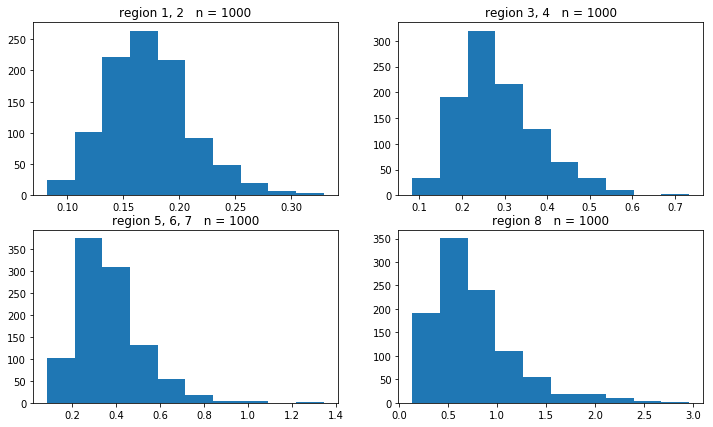

In [9]:
draw_four_hist_graphs(upper_u)

### 外壁のU値

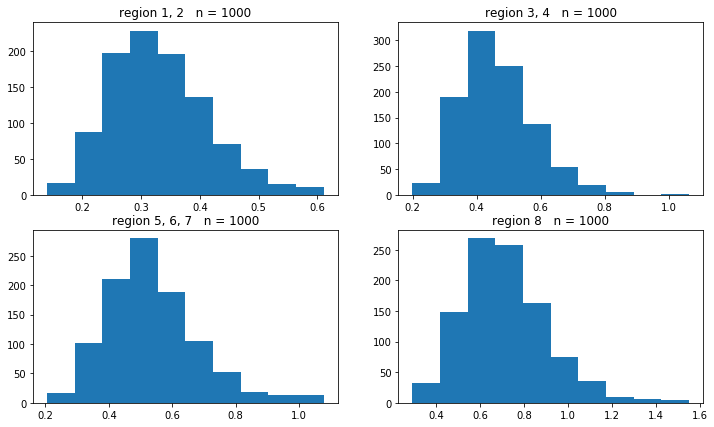

In [10]:
draw_four_hist_graphs(wall_u)

### 下部のU値

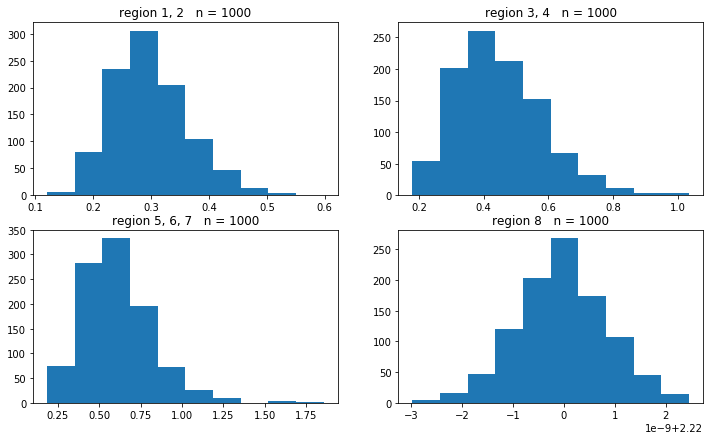

In [11]:
draw_four_hist_graphs(lower_u)

### 土間床外壁側のψ値

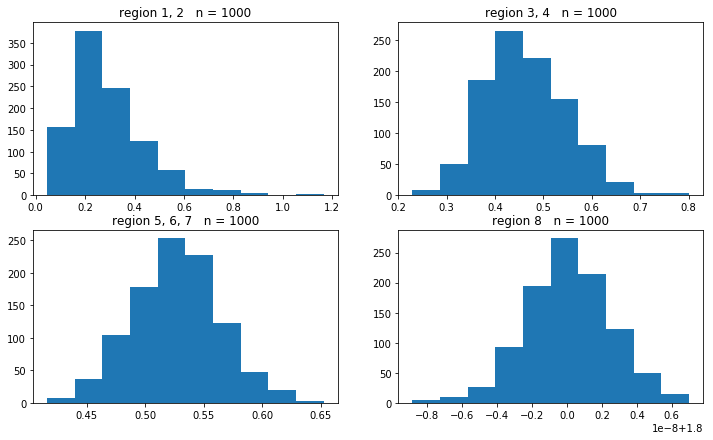

In [12]:
draw_four_hist_graphs(base_psi_outside)

### 土間床床下側のψ値

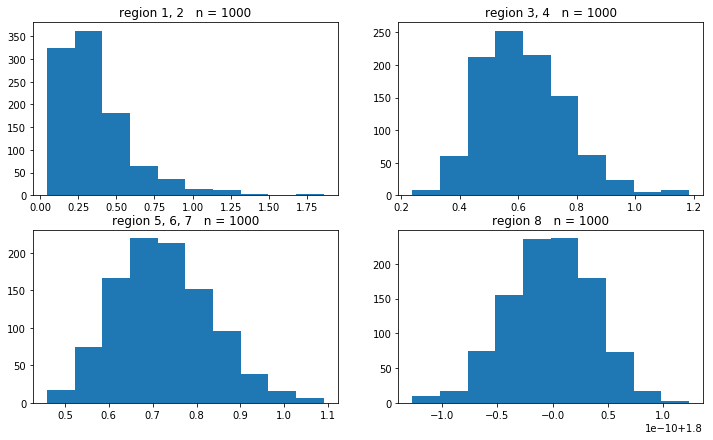

In [13]:
draw_four_hist_graphs(base_psi_inside)

### 窓のU値

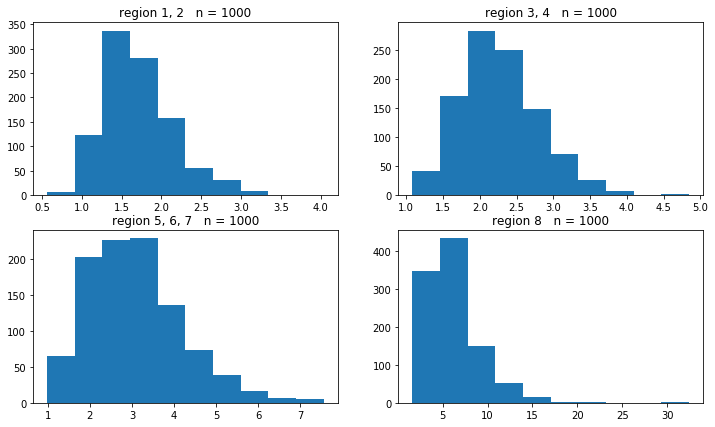

In [14]:
draw_four_hist_graphs(window_u)

### 窓（障子）のU値

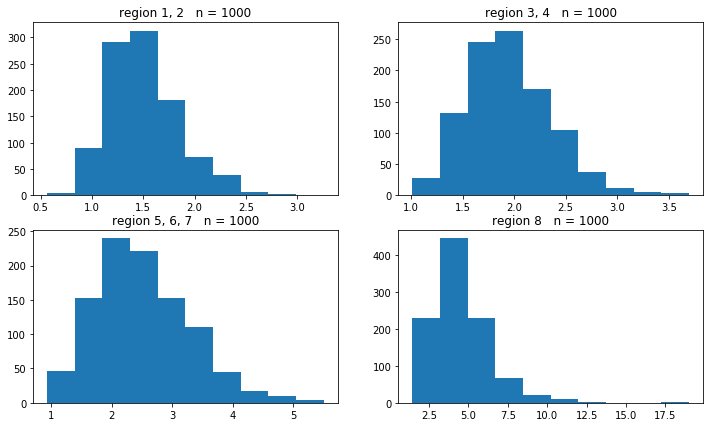

In [15]:
draw_four_hist_graphs(window_attachment_u)

### 窓のη値

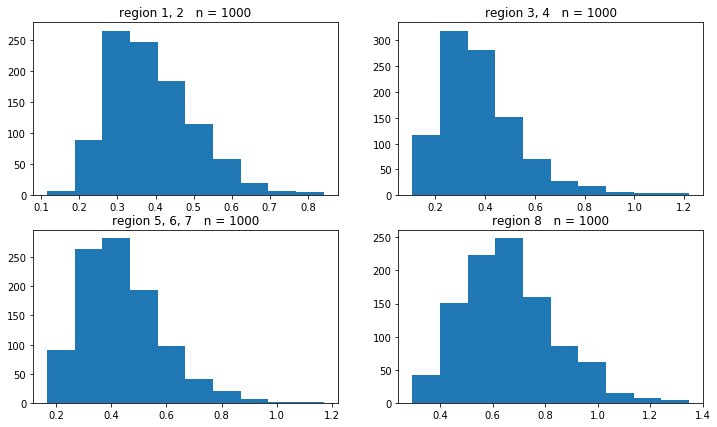

In [16]:
draw_four_hist_graphs(window_eta)

### 窓（障子）のη値

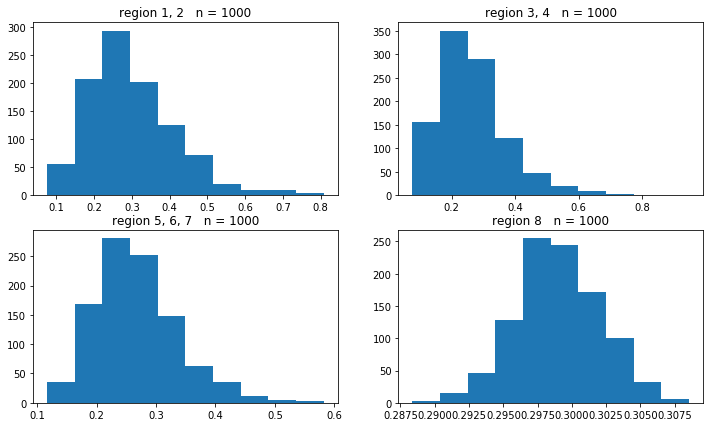

In [17]:
draw_four_hist_graphs(window_attachment_eta)

## 階数

In [18]:
story = np.array([
    np.random.choice(a=data_house['story']['a'], size=n, p=data_house['story']['p']['group_1']),
    np.random.choice(a=data_house['story']['a'], size=n, p=data_house['story']['p']['group_2']),
    np.random.choice(a=data_house['story']['a'], size=n, p=data_house['story']['p']['group_3']),
    np.random.choice(a=data_house['story']['a'], size=n, p=data_house['story']['p']['group_4'])
])

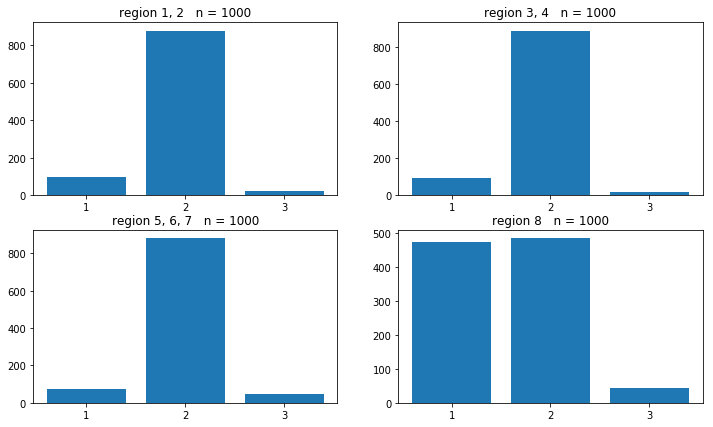

In [19]:
draw_four_bar_graphs(story, data_house['story']['a'])

## 床面積

In [20]:
floor_area = np.exp(np.random.normal(
    loc=data_house['floor_area']['log_ave'], scale=data_house['floor_area']['log_std'], size=n))

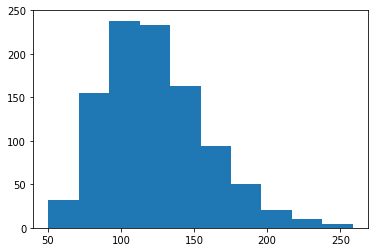

In [21]:
plt.hist(floor_area)
plt.show()

## アスペクト比

In [22]:
aspect_ratio = np.exp(np.random.normal(
    loc=data_house['aspect_ratio']['log_ave'], scale=data_house['aspect_ratio']['log_std'], size=n))

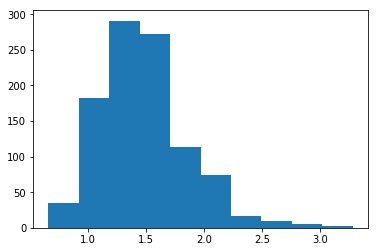

In [23]:
plt.hist(aspect_ratio)
plt.show()

## 主たる方位

In [24]:
direction = np.random.choice(
    a=data_house['direction']['a'], size=n, p=data_house['direction']['p'])

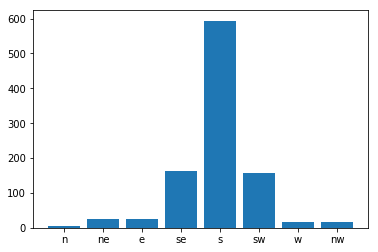

In [25]:
plt.bar(
    x=range(8),
    height=[np.count_nonzero(direction == d) for d in data_house['direction']['a']],
    tick_label=data_house['direction']['a'])
plt.show()

## 開口部比率

In [27]:
opening_ratio = np.exp(np.random.normal(
    loc=data_house['opening_ratio']['log_ave'], scale=data_house['opening_ratio']['log_std'], size=n))

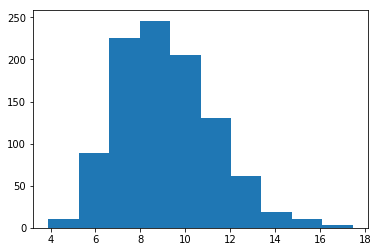

In [28]:
plt.hist(opening_ratio)
plt.show()